<a href="https://colab.research.google.com/github/adishireto/Deep-Learning-project-Diabetes-Diagnostic/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRO TO DEEP LEARNING - Final Project:**
Assigment submitters:


*   Adi Shireto - 318277514
*   Or Shmuel - 313442550

# **Diabetes Diagnostic**
# Introduction

Diabetes - This term includes people with problems with insulin, which is normally produced by the pancreas. Diabetes affects a person when there is a problem in the production of the hormone, which causes the level of sugar in the blood to rise. Diabetes is a serious disease affecting millions of people across the entire world. Thus, correct and timely prediction of this disease is very important due to the complications it can have in the case of other life-threatening diseases. The high blood sugar level is the primary cause mostly seen in this disease.
Dataset Used:
The dataset used for this project is Pima Indians Diabetes Dataset from Kaggle. This original dataset has been provided by the National Institute of Diabetes and Digestive and Kidney Diseases.

In [ ]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import itertools
from imblearn.over_sampling import SMOTE

# **Dataset**

This dataset is used to predict whether a patient is likely to get diabetes based on the input parameters like Age, Glucose, Blood pressure, Insulin, BMI, etc. Each row in the data provides relevant information about the patient. It is to be noted that all patients here are females minimum 21 years old belonging to Pima Indian heritage.

The data is contain the following elements:


*   Pregnancies: Number of times pregnant
*   Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

*   BloodPressure: Diastolic blood pressure (mm Hg)
*   SkinThickness: Triceps skin fold thickness (mm)

*   Insulin: 2-Hour serum insulin (mu U/ml)
*   BMI: Body mass index (weight in kg/(height in m)^2)

*   DiabetesPedigreeFunction: Diabetes pedigree function
*   Age: Age (years)

*   Outcome: Class variable (0 or 1)




In [ ]:
from pandas._libs.tslibs.vectorized import normalize_i8_timestamps
from google.colab import drive
drive.mount('/content/gdrive')
csv_path = '/content/gdrive/My Drive/DeepLearning/FinalProject/diabetes.csv'

labels = ['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age',	'Outcome']
data_set = pandas.read_csv(csv_path)
data_set

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data_set.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# **Pre-proccessing and Limitations of the data**

*   First we display the outcome on a graph and balance the amount of the minority outcome data to get higher accuracy of the model and deal with the small data issue.
*   Change value at unapproproate columns to a valid value.

1. Checked for NULL values.
2. Checked for 0 values at unapproproate columns.
3. Change those values to their median values per column.


*   Display the correlation by table and graphs
*   Division into bins for the three categories: Age, BMI and Pregnancies in order to make the calculations easier for the computer.


*   Normalize the data
*   Divide the data into train set and test set






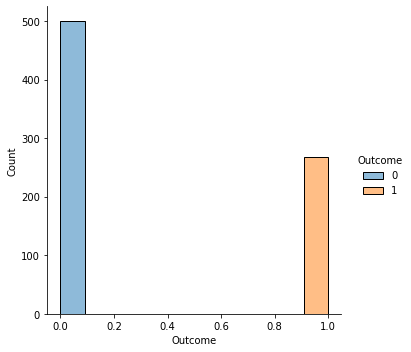

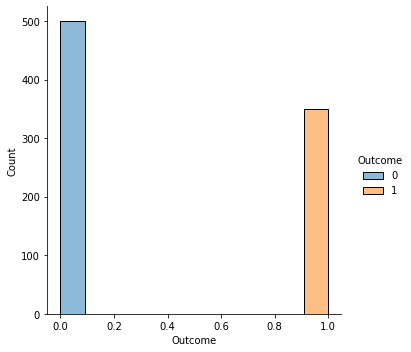

In [ ]:
sns.displot(data_set, x='Outcome' , kind='hist' , hue='Outcome')
plt.show()

data_extended, outcome_extended = SMOTE(sampling_strategy= 0.7,random_state=2,k_neighbors = 5).fit_resample(data_set[labels[:-1]].to_numpy(), data_set[labels[-1]].to_numpy().ravel())
data_set_extended = pandas.concat([pandas.DataFrame(data_extended), pandas.DataFrame(outcome_extended)], axis=1)
data_set_extended.columns= labels
data_set = data_set_extended
sns.displot(data_set , x='Outcome' , kind='hist' , hue='Outcome')
plt.show()

In [ ]:
# checking for missing values
# Check if there are NULL entries in the data
print(data_set.isnull().sum())

# Check if there are zeros values at unapproproate places
data_set.min()

# replace the 0 values with mean values
data_set['BMI'].replace(0, data_set['BMI'].median() , inplace = True)
data_set['BloodPressure'].replace(0, data_set['BloodPressure'].median(), inplace = True)
data_set['Insulin'].replace(0, data_set['Insulin'].median(), inplace = True)
data_set['Glucose'].replace(0, data_set['Glucose'].median() , inplace = True)
data_set['SkinThickness'].replace(0, data_set['SkinThickness'].median(), inplace = True)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


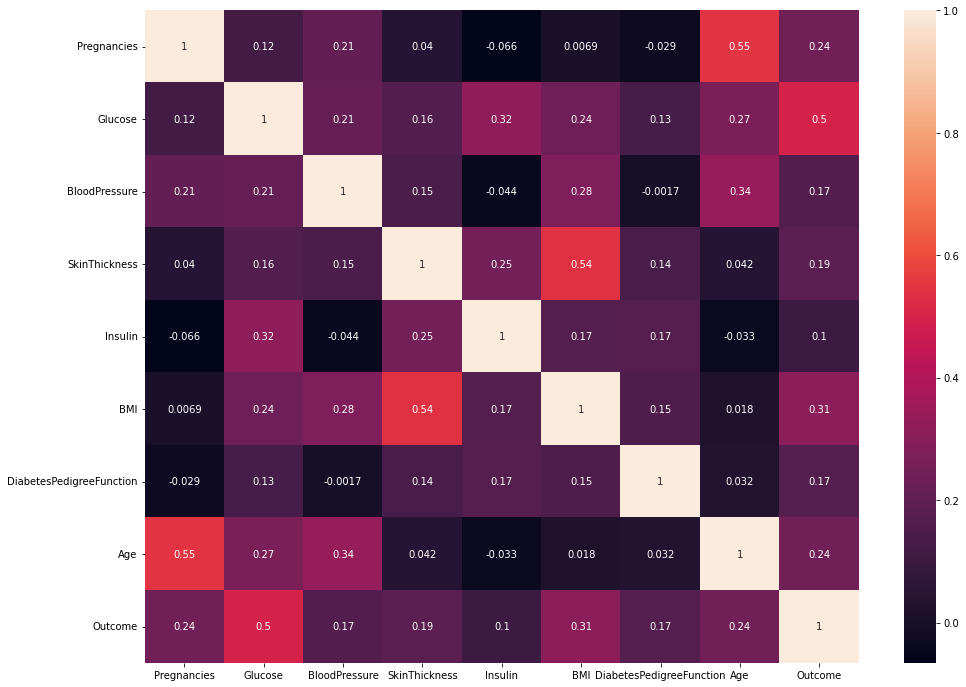

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.124035,0.208711,0.039595,-0.065683,0.006872,-0.028744,0.548464,0.242426
Glucose,0.124035,1.000000,0.213439,0.160715,0.317539,0.236262,0.133980,0.267777,0.500215
BloodPressure,0.208711,0.213439,1.000000,0.145812,-0.043628,0.279726,-0.001726,0.335719,0.165413
SkinThickness,0.039595,0.160715,0.145812,1.000000,0.249927,0.539245,0.141515,0.041726,0.186959
Insulin,-0.065683,0.317539,-0.043628,0.249927,1.000000,0.170353,0.173159,-0.033404,0.102281
BMI,0.006872,0.236262,0.279726,0.539245,0.170353,1.000000,0.151943,0.017913,0.308720
DiabetesPedigreeFunction,-0.028744,0.133980,-0.001726,0.141515,0.173159,0.151943,1.000000,0.032030,0.167693
Age,0.548464,0.267777,0.335719,0.041726,-0.033404,0.017913,0.032030,1.000000,0.244125
Outcome,0.242426,0.500215,0.165413,0.186959,0.102281,0.308720,0.167693,0.244125,1.000000


In [ ]:
# correlation map
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(data_set.corr(), annot=True)
plt.show()

# correlation table
data_set.corr()

As we can see from the table, the biggest correlation with the outcome is of the Glucose, after it BMI and Age.

plot of:  Pregnancies


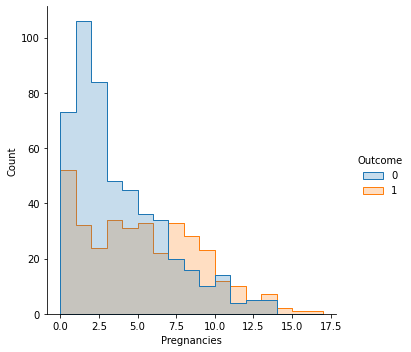

plot of:  Glucose


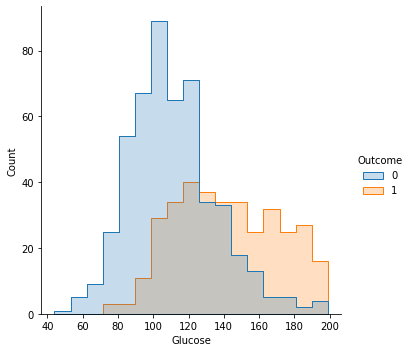

plot of:  BloodPressure


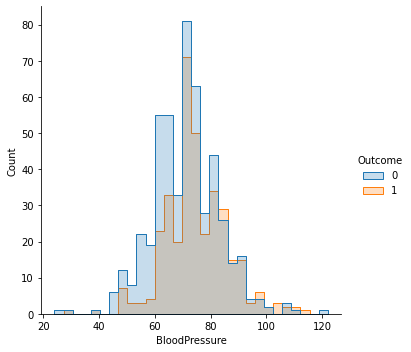

plot of:  SkinThickness


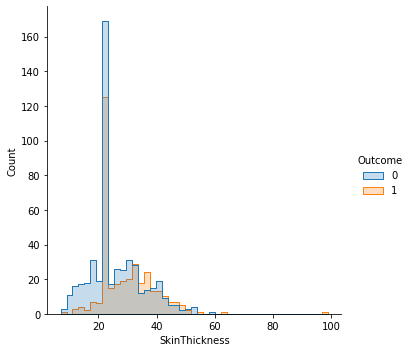

plot of:  Insulin


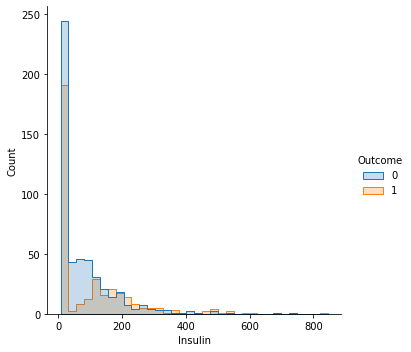

plot of:  BMI


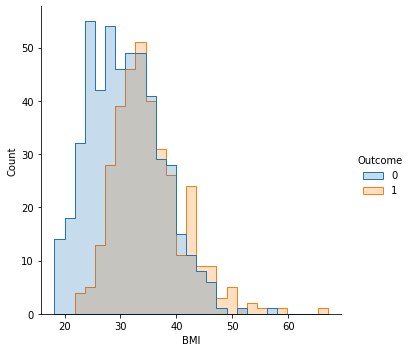

plot of:  DiabetesPedigreeFunction


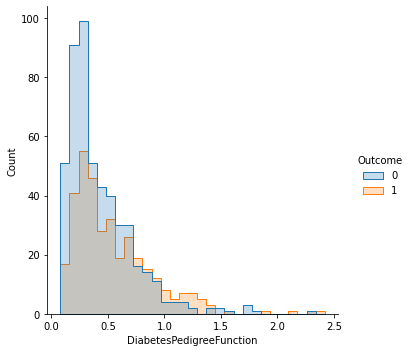

plot of:  Age


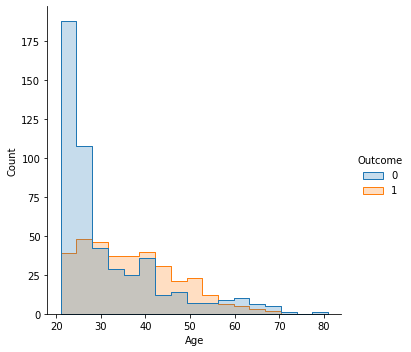

In [ ]:
# correlation between each parameter to the outcome
for columns in data_set.columns:
    if columns == 'Outcome':
      break
    print("plot of: ", columns)
    sns.displot(data_set, x=columns , kind='hist' , hue='Outcome', element='step')
    plt.show()

As we can see, participants who experienced fewer pregnancies are less likely to develop diabetes.

Also, participants who were found to have high blood glucose levels were diagnosed with diabetes.

From the blood pressure graph, it can be concluded that for the same range of values the distribution is almost the same.

Also, from the graph of skin thickness, it can be seen that participants who were diagnosed as sick have thicker skin.

In addition, for the level of insulin in the blood it can be seen that participants with lower insulin levels were diagnosed without diabetes, but on the other hand, a lot of participents who have a lower insulin level were diadnosed as sick.

From the BMI graph it can be seen that participants with a higher BMI were diagnosed with diabetes.

At DiabetesPedigreeFunction graph we can see that participents with lower connection to family who diagnosed with diabetes were diagnosed without diabetes.

Also, it can be noticed that there are more participants between the ages of 40-60 who were diagnosed with diabetes

In conclusion, we saw the corrolation map and the graph per each parameter and we can understand that it match to each other and again we can see that Glocuse and BMI are with the biggest influence.

In [ ]:
# Another pre-processing we performed is a division into bins,
# for example, participants aged 23 or 24, we would like them to be in the same age group.

# ---------------- Age bin -------------------------------------------------- #
Age = data_set['Age']
Age_bins = [min(Age)-1,(max(Age)/3),(2*max(Age)/3), max(Age)+1]
Age_binnames = 25, 40, 67
Age_categories = pandas.cut(Age, Age_bins, labels=Age_binnames)
for i in range(Age.size):
  data_set['Age'][i] = Age_categories[i]
# --------------------------------------------------------------------------- #
# ---------------- DiabetesPedigreeFunction bin ----------------------------- #
DiabetesPedigreeFunction = data_set['DiabetesPedigreeFunction']
DiabetesPedigreeFunction_bins = [min(DiabetesPedigreeFunction)-0.5,(max(DiabetesPedigreeFunction)/2), max(DiabetesPedigreeFunction)+1]
DiabetesPedigreeFunction_binnames = 1, 2
DiabetesPedigreeFunction_categories = pandas.cut(DiabetesPedigreeFunction, DiabetesPedigreeFunction_bins, labels=DiabetesPedigreeFunction_binnames)
for i in range(DiabetesPedigreeFunction.size):
  data_set['DiabetesPedigreeFunction'][i] = DiabetesPedigreeFunction_categories[i]
# --------------------------------------------------------------------------- #
# ---------------- Pregnancies bin ------------------------------------------ #
Pregnancies = data_set['Pregnancies']
Pregnancies_bins = [min(Pregnancies)-1,(max(Pregnancies)/3),(2*max(Pregnancies)/3), max(Pregnancies)+1]
Pregnancies_binnames = 2, 8, 13
Pregnancies_categories = pandas.cut(Pregnancies, Pregnancies_bins, labels=Pregnancies_binnames)
for i in range(Pregnancies.size):
  data_set['Pregnancies'][i] = Pregnancies_categories[i]

# The update Data Frame:
data_set

<ipython-input-404-818baf17e2c7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['Age'][i] = Age_categories[i]
<ipython-input-404-818baf17e2c7>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['DiabetesPedigreeFunction'][i] = DiabetesPedigreeFunction_categories[i]
<ipython-input-404-818baf17e2c7>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['Pregnancies'][i] = Pregnancies_categories[i]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,8.0,148.000000,72.000000,35.000000,7.000000,33.600000,1.0,40.0,1
1,2.0,85.000000,66.000000,29.000000,7.000000,26.600000,1.0,40.0,0
2,8.0,183.000000,64.000000,23.000000,7.000000,23.300000,1.0,40.0,1
3,2.0,89.000000,66.000000,23.000000,94.000000,28.100000,1.0,25.0,0
4,2.0,137.000000,40.000000,35.000000,168.000000,43.100000,2.0,40.0,1
...,...,...,...,...,...,...,...,...,...
845,8.0,104.850770,80.684260,23.000000,7.000000,30.887716,1.0,40.0,1
846,2.0,175.144376,58.980894,23.307859,191.711247,33.096179,1.0,40.0,1
847,2.0,128.322088,79.762784,23.000000,7.000000,37.673775,1.0,40.0,1
848,2.0,121.360417,66.102976,29.433630,165.772323,34.104345,1.0,40.0,1


Here we divided the data into train set, test set and split the data from the outcome

In [ ]:
# Normalize the data according to the following formula: z = (x - u) / s
x, y = data_set.drop(['Outcome'],  axis=1), data_set['Outcome']
x_norm = (x-x.mean(axis=0))/x.std(axis=0)
data_set = pandas.concat([x_norm, y], axis=1)

# Shuffel the data:
data_set = data_set.sample(frac=1).reset_index(drop=True)

# divide the data to train and test sets
train_norm_xs, test_norm_xs = data_set[:round(len(data_set)*0.7)], data_set[round(len(data_set)*0.7):]

# **Network**
In this section we implement our model called DModel.

We determind the in_feature for the first layer to be 8 due to the number of our paramrters at the data fram.
We decided to build our network as ANN with 7 fully connected layers.

In addition, we decided to build our forward function by the following structure:

*   x = self.layer_x(x)
*   x = self.batchnorm_x(x)
*   x = F.relu(x)
*   x = self.dropout(x)

The Dropuot function help us to deal with overfitting problem due to small data set.

At the final layer we use Sigmoid activation function due to get the values in range 0 to 1.

Our problen is a binery classification problem, therefore we decided to use BCE (Binary Cross Entropy) as our loss function.

We use SGD optimizer that gave us a better results.

In [ ]:
class DModel(nn.Module):
    def __init__(self, n=64):
        super(DModel, self).__init__()
        self.n = n
        self.layer1 = nn.Linear(in_features=8, out_features=n)
        self.layer2 = nn.Linear(in_features=n, out_features=2*n)
        self.layer3 = nn.Linear(in_features=2*n, out_features=4*n)
        self.layer4 = nn.Linear(in_features=4*n, out_features=8*n)
        self.layer5 = nn.Linear(in_features=8*n, out_features=4*n)
        self.layer6 = nn.Linear(in_features=4*n, out_features=2*n)
        self.layer7 = nn.Linear(in_features=2*n, out_features=1)

        self.dropout = nn.Dropout(0.3)
        self.batchnorm1 = nn.BatchNorm1d(n)
        self.batchnorm2 = nn.BatchNorm1d(2*n)
        self.batchnorm3 = nn.BatchNorm1d(4*n)
        self.batchnorm4 = nn.BatchNorm1d(8*n)
        self.batchnorm5 = nn.BatchNorm1d(4*n)
        self.batchnorm6 = nn.BatchNorm1d(2*n)
        self.Sigmoid = nn.Sigmoid()

    def forward(self, x, verbose=False):
        x = self.layer1(x)
        x = self.batchnorm1(x)
        x = F.relu(x)
#------------------------------
        x = self.layer2(x)
        x = self.batchnorm2(x)
        x = F.relu(x)
        x = self.dropout(x)
#------------------------------
        x = self.layer3(x)
        x = self.batchnorm3(x)
        x = F.relu(x)
        x = self.dropout(x)
#------------------------------
        x = self.layer4(x)
        x = self.batchnorm4(x)
        x = F.relu(x)
        x = self.dropout(x)
#------------------------------
        x = self.layer5(x)
        x = self.batchnorm5(x)
        x = F.relu(x)
        x = self.dropout(x)
#------------------------------
        x = self.layer6(x)
        x = self.batchnorm6(x)
        x = F.relu(x)
        x = self.dropout(x)
#------------------------------
        x = self.layer7(x)
        pred_outcome = self.Sigmoid(x)
#------------------------------
        return pred_outcome

In [ ]:
# Accuracy function
def get_accuracy(y, t):
  acc = 0
  N = 0
  for i in range(len(y)):
    N += 1
    if (y[i] >= 0.5 and t[i] == 1) or (y[i] < 0.5 and t[i] == 0):
      acc += 1
  return acc / N

In [ ]:
# plots and graphs
def plot_learning_curve(iters, losses, train_accs, val_accs):
  """
  Plot the learning curve.
  """
  plt.title("Learning Curve: Loss per Epoch")
  plt.plot(iters, losses, label="Train")
  plt.xlabel("Epoches")

  plt.ylabel("Loss")
  plt.show()
  plt.title("Learning Curve: Accuracy per Epoch")
  plt.plot(iters, train_accs, label="Train")
  plt.plot(iters, val_accs, label="Validation")
  plt.xlabel("Epoches")
  plt.ylabel("Accuracy")
  plt.legend(loc='best')
  plt.show()

# **Training the model**
At the train function we divide the train set to train and validation sets and seprate the 'Outcome' column from the rest of the data, in addition we are shuffeling each of them at the begining of each epoch.

In [ ]:
def train(num_epochs, batch_size, model, train_data, learning_rate, print_en=False):
  epochs = []
  preds = []
  preds_val = []
  train_acc = []
  valid_acc = []
  train_losses = []
  valid_dataWithOutcome, train_dataWithOutcome = train_data[:100], train_data[100:]
  criterion = nn.BCELoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=0.001)
  n = 0
  model.train()
  for epoch in range(num_epochs):
    train_loss = 0

    # Shuffle the training and validation sets
    train_dataWithOutcome = train_dataWithOutcome.sample(frac=1).reset_index(drop=True)
    valid_dataWithOutcome = valid_dataWithOutcome.sample(frac=1).reset_index(drop=True)
    train_data, train_outcome = train_dataWithOutcome.drop(['Outcome'],  axis=1), train_dataWithOutcome['Outcome']
    valid_data, valid_outcome = train_dataWithOutcome.drop(['Outcome'],  axis=1), train_dataWithOutcome['Outcome']
    train_data = torch.Tensor(train_data.to_numpy())
    train_outcome = torch.Tensor(train_outcome.to_numpy())
    valid_data = torch.Tensor(valid_data.to_numpy())
    valid_outcome = torch.Tensor(valid_outcome.to_numpy())

    for i in range(0, train_data.shape[0], batch_size):
      if (i + batch_size) > train_data.shape[0]:
          break

      # forward
      optimizer.zero_grad()                 # a clean up step for PyTorch
      pred = model(train_data[i:i+batch_size])
      loss = criterion(pred.view(batch_size,1), train_outcome[i:i+batch_size].view(batch_size,1))
      train_loss += loss.item()
      pred = list(pred.detach().numpy())
      preds.append(pred)

      # backward
      loss.backward()
      optimizer.step()

      # validation
      pred_val = model(torch.Tensor(valid_data[i:i+batch_size]))
      pred_val = list(pred_val.detach().numpy())
      preds_val.append(pred_val)

    # calculate accuracy for each epoch
    preds = list(itertools.chain.from_iterable(preds))
    preds_val = list(itertools.chain.from_iterable(preds_val))
    train_acc.append(get_accuracy(preds, train_outcome[:len(preds)]))
    valid_acc.append(get_accuracy(preds_val, valid_outcome[:len(preds_val)]))

    preds = []
    preds_val = []
    n += 1
    train_losses.append(train_loss/(train_data.shape[0]/batch_size))
    epochs.append(n)
    if print_en:
      print(f"epoch: {epoch+1}/{num_epochs} - train loss: {train_losses[-1]:0.4f} train_acc: {train_acc[-1]*100:0.3f} % val_acc: {valid_acc[-1]*100:0.3f} %")
  return epochs, train_losses, train_acc, valid_acc

# **Results**
In this part of the project we have reached the stage where we train the network with different hyperparameters in order to find the best combination for our network.

The first combination:
*   num_epochs = 80
*   batch_size = 32
*   learning_rate = 0.0001

The model does not converge and the loss are too high.

The second combination:
* num_epochs = 1000
* batch_size = 10
* learning_rate = 0.005

Although the curve looks better, when we checked the results for the test set we got a very similar accuracy to our chosen combination where we performed less epochs, possibly due to overfitting, so we preferred the other combination.

The third combination:
* num_epochs = 120
* batch_size = 8
* learning_rate = 0.03

The loss decreases slowly and very noisy and similarly the accuracy also improves slowly.

The fourth combination:
* num_epochs = 400
* batch_size = 60
* learning_rate = 0.001

The model does converge and the curves look good, but the accuracy is not high enough.

The first combination


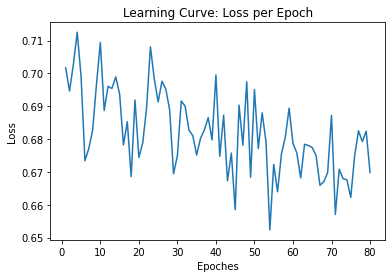

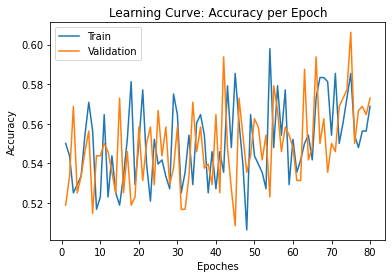

Train accuracy: 0.56875 , Valid accuracy: 0.5729166666666666
The second combination


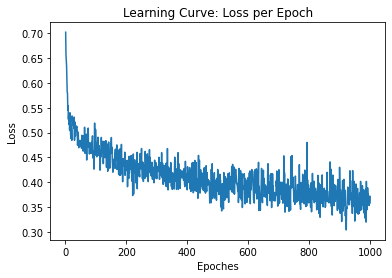

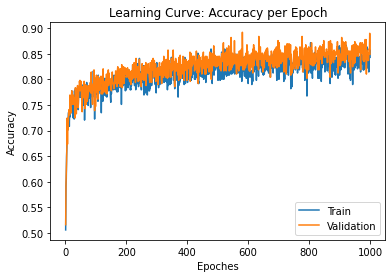

Train accuracy: 0.8428571428571429 , Valid accuracy: 0.8489795918367347
The third combination


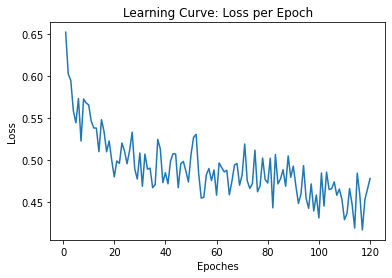

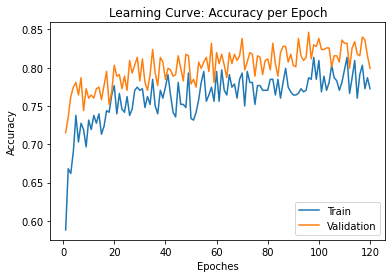

Train accuracy: 0.7725409836065574 , Valid accuracy: 0.7991803278688525
The fourth combination


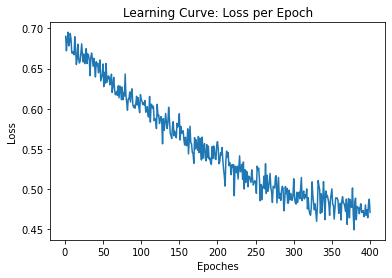

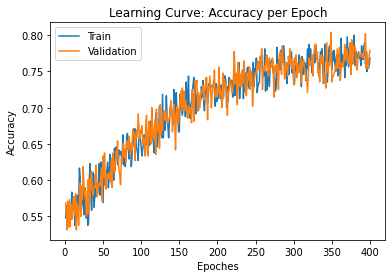

Train accuracy: 0.76875 , Valid accuracy: 0.7791666666666667


In [ ]:
# training the model with hyperparameters
print("The first combination")
model = DModel()
epochs, train_losses, train_acc, valid_acc = train(80, 32, model, train_norm_xs, 0.0001, False)
plot_learning_curve(epochs, train_losses, train_acc, valid_acc)
print("Train accuracy: {t} , Valid accuracy: {v}".format(t=train_acc[-1],v=valid_acc[-1]))

# training the model with hyperparameters
print("The second combination")
model = DModel()
epochs, train_losses, train_acc, valid_acc = train(1000, 10, model, train_norm_xs, 0.005, False)
plot_learning_curve(epochs, train_losses, train_acc, valid_acc)
print("Train accuracy: {t} , Valid accuracy: {v}".format(t=train_acc[-1],v=valid_acc[-1]))

# training the model with hyperparameters
print("The third combination")
model = DModel()
epochs, train_losses, train_acc, valid_acc = train(120, 8, model, train_norm_xs, 0.03, False)
plot_learning_curve(epochs, train_losses, train_acc, valid_acc)
print("Train accuracy: {t} , Valid accuracy: {v}".format(t=train_acc[-1],v=valid_acc[-1]))

# training the model with hyperparameters
print("The fourth combination")
model = DModel()
epochs, train_losses, train_acc, valid_acc = train(400, 60, model, train_norm_xs, 0.001, False)
plot_learning_curve(epochs, train_losses, train_acc, valid_acc)
print("Train accuracy: {t} , Valid accuracy: {v}".format(t=train_acc[-1],v=valid_acc[-1]))


Here we train the model with the best hyperparameters which gave us the best accuracy for the test set with the smallest runtime and minimize resources.




In [ ]:
# training the model with the best hyperparameters that we chosed
model = DModel()
epochs, train_losses, train_acc, valid_acc = train(200, 10, model, train_norm_xs, 0.007, True)

epoch: 1/200 - train loss: 0.6899 train_acc: 53.673 % val_acc: 58.571 %
epoch: 2/200 - train loss: 0.6573 train_acc: 56.939 % val_acc: 65.102 %
epoch: 3/200 - train loss: 0.6256 train_acc: 64.898 % val_acc: 67.551 %
epoch: 4/200 - train loss: 0.6043 train_acc: 65.510 % val_acc: 69.796 %
epoch: 5/200 - train loss: 0.5797 train_acc: 69.796 % val_acc: 65.714 %
epoch: 6/200 - train loss: 0.5807 train_acc: 69.388 % val_acc: 67.143 %
epoch: 7/200 - train loss: 0.5357 train_acc: 70.612 % val_acc: 72.041 %
epoch: 8/200 - train loss: 0.5608 train_acc: 70.204 % val_acc: 72.449 %
epoch: 9/200 - train loss: 0.5452 train_acc: 72.857 % val_acc: 72.245 %
epoch: 10/200 - train loss: 0.5090 train_acc: 72.041 % val_acc: 74.898 %
epoch: 11/200 - train loss: 0.5304 train_acc: 73.265 % val_acc: 74.694 %
epoch: 12/200 - train loss: 0.5359 train_acc: 71.020 % val_acc: 73.673 %
epoch: 13/200 - train loss: 0.5311 train_acc: 75.102 % val_acc: 74.286 %
epoch: 14/200 - train loss: 0.5014 train_acc: 72.857 % val_a

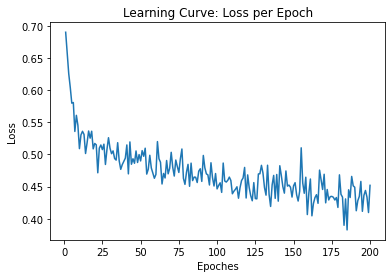

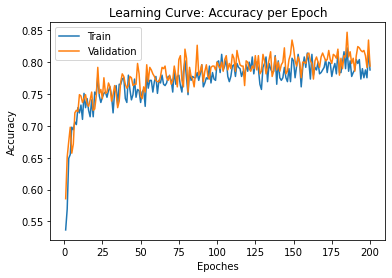

In [ ]:
# plots and graphs
plot_learning_curve(epochs, train_losses, train_acc, valid_acc)

In [ ]:
# checking the test set on our model
def predict(model,data):
  pred=model(data)
  return pred

test_x, test_y = test_norm_xs.drop(['Outcome'],  axis=1), test_norm_xs['Outcome']
y = predict(model, torch.Tensor(test_x.to_numpy()))

print(get_accuracy(y, torch.Tensor(test_y.to_numpy())))

0.796078431372549


# **Result analysis**
After multiple attempts we realized that there is no need for too many epochs in order to reach the maximum possible accuracy. Also, we realized that we have to work with small batch of data as a result of the fact that our dataset is relatively small. In order to find the best and most appropriate learning rate for our model, we performed many trials until we reached the selected value.

As we can see the loss curve decreases at a relatively good rate and reaches a low value. Also, the accuracy curves of the training set and the validation set rise quickly and stabilize at a high value of 80 percent approximatly.

Finally, when we test the model on the test set we manage to achieve about 80 percent accuracy.

# **Benchmark-Comparison to an existing model**
In this section we will make a comparison, in order to examine the results and evaluate the performance of our model compared to an existing model we found in Keggel.

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
xgb_cls = xgb.XGBClassifier()
# X_train, X_test, Y_train, Y_test = train_test_split(data_set[labels[:-1]], data_set[labels[-1]], train_size=0.7, test_size=0.3,random_state=0)
xgb_cls.fit(train_norm_xs[labels[:-1]] , train_norm_xs[labels[-1]])

pred = xgb_cls.predict(test_x)

accuracy_score(test_y, pred)

0.7529411764705882

# **Conclusion**
In conclusion, during the project we were required to classify whether a participant might be diagnosed with diabetes using medical information collected about him.

In order to perform the task, we pre-processed the data such as updating missing values, normalizing the data and checking the correlation between the parameters, all in order to facilitate the computer's calculations and allow the model to receive more accurate and unbiased values.

After that we built a neural network with 7 layers which were selected after trials and tests of different models.

Finally, we trained the network using different hyperparameters and chose the best combination that brought us the maximum result.

As we can see, compared to an existing model that was published in Kaggle, we were able to achieve a higher accuracy, which indicates the quality of our model.